### Problem Statement
You need to build a model that is able to classify customer complaints based on the products/services. By doing so, you can segregate these tickets into their relevant categories and, therefore, help in the quick resolution of the issue.

In [1]:
# Installing swifter

! pip install swifter

  Created wheel for swifter: filename=swifter-1.3.5-py3-none-any.whl size=16539 sha256=3057aeb44ec8da6d86f7270ad71dc6a386e301c43eabd36b9699d7fb879534a9
  Stored in directory: c:\users\quras\appdata\local\pip\cache\wheels\11\fa\0c\206ff1fd0768840430703316638c8eb829081f3388bfa195c0
Successfully built swifter


In [2]:
# Installing wordcloud

! pip install wordcloud

In [3]:
# Installing textblob

! pip install -U textblob
! python -m textblob.download_corpora

Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\quras\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\quras\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\quras\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\quras\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\quras\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\quras\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\movie_reviews.zip.


In [4]:
# Importing all necessary libraries

import json 
import numpy as np
import pandas as pd
import re, nltk, spacy, string
import en_core_web_sm
nlp = en_core_web_sm.load()
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint

import swifter
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize, pos_tag

from textblob import TextBlob

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

import itertools
from sklearn import metrics

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\quras\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\quras\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\quras\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
# Opening JSON file 
f = open(r'D:\Upgrade Master Degree\Air Ticket Classification\complaints-2021-05-14_08_16.json') 
  
# returns JSON object as  
# a dictionary 
data = json.load(f)
df=pd.json_normalize(data)

### Data Preparation

In [7]:
# Inspect the dataframe to understand the given data.

df.head()

,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,...,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


In [8]:
# print the column names

df.columns

Index(['_index', '_type', '_id', '_score', '_source.tags', '_source.zip_code',
       '_source.complaint_id', '_source.issue', '_source.date_received',
       '_source.state', '_source.consumer_disputed', '_source.product',
       '_source.company_response', '_source.company', '_source.submitted_via',
       '_source.date_sent_to_company', '_source.company_public_response',
       '_source.sub_product', '_source.timely',
       '_source.complaint_what_happened', '_source.sub_issue',
       '_source.consumer_consent_provided'],
      dtype='object')

In [9]:
# Assign new column names - strip off '_source' from column names

df.rename(columns=lambda x: x.replace('_source.', ''), inplace=True)
df.rename(columns=lambda x: x.strip('_'), inplace=True)
df.head()

,index,type,id,score,tags,zip_code,complaint_id,issue,date_received,state,...,company_response,company,submitted_via,date_sent_to_company,company_public_response,sub_product,timely,complaint_what_happened,sub_issue,consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


In [16]:
# Assign nan in place of blanks in the complaints column

df['complaint_what_happened'] = np.where(df['complaint_what_happened'] =='', np.nan, df['complaint_what_happened'])
df['complaint_what_happened']

0                                                      NaN
1        Good morning my name is XXXX XXXX and I apprec...
2        I upgraded my XXXX XXXX card in XX/XX/2018 and...
3                                                      NaN
4                                                      NaN
                               ...                        
78308                                                  NaN
78309    On Wednesday, XX/XX/XXXX I called Chas, my XXX...
78310    I am not familiar with XXXX pay and did not un...
78311    I have had flawless credit for 30 yrs. I've ha...
78312    Roughly 10+ years ago I closed out my accounts...
Name: complaint_what_happened, Length: 78313, dtype: object

In [17]:
# Remove all rows where complaints column is nan

df= df[~(df['complaint_what_happened'].isna())]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21072 entries, 1 to 78312
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      21072 non-null  object 
 1   type                       21072 non-null  object 
 2   id                         21072 non-null  object 
 3   score                      21072 non-null  float64
 4   tags                       3816 non-null   object 
 5   zip_code                   16427 non-null  object 
 6   complaint_id               21072 non-null  object 
 7   issue                      21072 non-null  object 
 8   date_received              21072 non-null  object 
 9   state                      20929 non-null  object 
 10  consumer_disputed          21072 non-null  object 
 11  product                    21072 non-null  object 
 12  company_response           21072 non-null  object 
 13  company                    21072 non-null  obj

**Once you have removed all the blank complaints, you need to:**

- Make the text lowercase
- Remove text in square brackets
- Remove punctuation
- Remove words containing numbers

In [18]:
# Function to clean the text and remove all the unnecessary elements.

def clean_text(text):
    text = text.lower()
    text = re.sub("\[.*\]", "", text)
    #text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub('[^\w\s]',' ',text)
    text = re.sub("\S*\d\S*", "", text)
    return text

df["complaint_what_happened"] = df["complaint_what_happened"].swifter.apply(clean_text)

Pandas Apply:   0%|          | 0/21072 [00:00<?, ?it/s]

In [20]:
df.reset_index(drop = True, inplace=True)
df.loc[152,'complaint_what_happened']

'jpmorgan chase bank and xxxx xxxx xxxx xxxx xxxx credit reporting dispute   this discrepancy on my credit report was disputed with xxxx  the outcome has resulted in insufficient change to the report  the information that disputed and is indeed false was incorrectly verified as correct by jpmorgan chase to xxxx  this notice is attached   a    \nthis account  xxxx  is correctly identified on the credit report as opening xx xx xxxx  the first payment was made on time on xx xx xxxx as evidenced by my bank statement from that time   attachment b    ive included the second bank statement showing the on time payment   attachment c    i can provide evidence of every single payment being made on time  however it seemed excessive  especially since jpmorgan chase is well aware that every payment was made on time  \ni filed chapter xxxx bankruptcy in xx xx xxxx  this loan was not included in the bankruptcy  i signed and submitted a reaffirmation letter jpmorgan chase  however they did not sign an

In [22]:
# Function from Lemmatization
def lemmatize_text(text):     
    lemmatized = []
    doc = nlp(text)
    for word in doc:
        lemmatized.append(word.lemma_)        
    return " ".join(lemmatized)

# get nouns 

def get_nouns(text):
    Text = TextBlob(text)
    return ' '.join([ word for (word,tag) in Text.tags if tag == "NN" or tag =='NNS'])

In [23]:
# Applying Lemmatizing function

df['complaints_lemma'] =  df['complaint_what_happened'].swifter.apply(lemmatize_text)
df['complaint_POS_removed'] =  df['complaints_lemma'].swifter.apply(get_nouns)

Pandas Apply:   0%|          | 0/21072 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/21072 [00:00<?, ?it/s]

In [24]:
# Create a dataframe('df_clean') that will have only the complaints and the lemmatized complaints 

df_clean = df[['complaint_what_happened','complaints_lemma','complaint_POS_removed']].copy()
df_clean

,complaint_what_happened,complaints_lemma,complaint_POS_removed
0,good morning my name is xxxx xxxx and i apprec...,good morning my name be xxxx xxxx and I apprec...,morning name stop bank cardmember service ask ...
1,i upgraded my xxxx xxxx card in xx xx and was...,I upgrade my xxxx xxxx card in xx xx and be ...,card agent upgrade date agent information orde...
2,chase card was reported on xx xx however fr...,chase card be report on xx xx however fra...,card application identity consent service cred...
3,on xx xx while trying to book a xxxx xxxx ...,on xx xx while try to book a xxxx xxxx ...,try book xxxx ticket offer ticket card informa...
4,my grand son give me check for i deposit ...,my grand son give I check for I deposit ...,son chase account fund bank account pay money ...
...,...,...,...
21067,after being a chase card customer for well ove...,after be a chase card customer for well over a...,card customer decade solicitation credit card ...
21068,on wednesday xx xx xxxx i called chas my xxx...,on wednesday xx xx xxxx I call chas my xxx...,visa credit card provider claim purchase prote...
21069,i am not familiar with xxxx pay and did not un...,I be not familiar with xxxx pay and do not und...,pay risk provide consumer bank app chase year ...
21070,i have had flawless credit for yrs i ve had ...,I have have flawless credit for yrs I ve h...,credit yrs credit card chase freedom xxxx prob...


### Exploratory data analysis


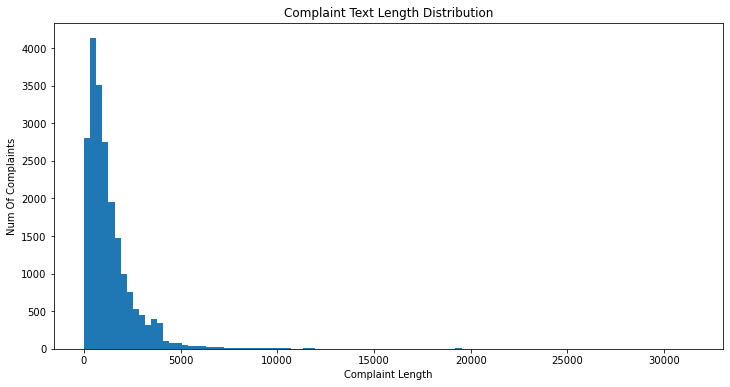

In [25]:
# Code to visualise the data according to the 'Complaint' character length

df_clean['complaint_len'] = df_clean['complaint_what_happened'].astype(str).apply(len)

plt.figure(figsize=(12,6))
df_clean['complaint_len'].plot.hist(bins=100, title='Complaint Text Length Distribution')
plt.xlabel('Complaint Length')
plt.ylabel('Num Of Complaints')
plt.show()

In [32]:
# Removing -PRON- from the text corpus

df_clean['Complaint_clean'] = df_clean['complaint_POS_removed'].str.replace('-PRON-', '')
df_clean

,complaint_what_happened,complaints_lemma,complaint_POS_removed,complaint_len,Complaint_clean
0,good morning my name is xxxx xxxx and i apprec...,good morning my name be xxxx xxxx and I apprec...,morning name stop bank cardmember service ask ...,482,morning name stop bank cardmember service ask ...
1,i upgraded my xxxx xxxx card in xx xx and was...,I upgrade my xxxx xxxx card in xx xx and be ...,card agent upgrade date agent information orde...,351,card agent upgrade date agent information orde...
2,chase card was reported on xx xx however fr...,chase card be report on xx xx however fra...,card application identity consent service cred...,220,card application identity consent service cred...
3,on xx xx while trying to book a xxxx xxxx ...,on xx xx while try to book a xxxx xxxx ...,try book xxxx ticket offer ticket card informa...,1470,try book xxxx ticket offer ticket card informa...
4,my grand son give me check for i deposit ...,my grand son give I check for I deposit ...,son chase account fund bank account pay money ...,466,son chase account fund bank account pay money ...
...,...,...,...,...,...
21067,after being a chase card customer for well ove...,after be a chase card customer for well over a...,card customer decade solicitation credit card ...,668,card customer decade solicitation credit card ...
21068,on wednesday xx xx xxxx i called chas my xxx...,on wednesday xx xx xxxx I call chas my xxx...,visa credit card provider claim purchase prote...,2113,visa credit card provider claim purchase prote...
21069,i am not familiar with xxxx pay and did not un...,I be not familiar with xxxx pay and do not und...,pay risk provide consumer bank app chase year ...,2317,pay risk provide consumer bank app chase year ...
21070,i have had flawless credit for yrs i ve had ...,I have have flawless credit for yrs I ve h...,credit yrs credit card chase freedom xxxx prob...,2129,credit yrs credit card chase freedom xxxx prob...


In [33]:
# Function to extract n_gram 

def get_top_n_ngram(corpus, n_gram_range, n=None):
    vec = CountVectorizer(ngram_range=(n_gram_range, n_gram_range), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

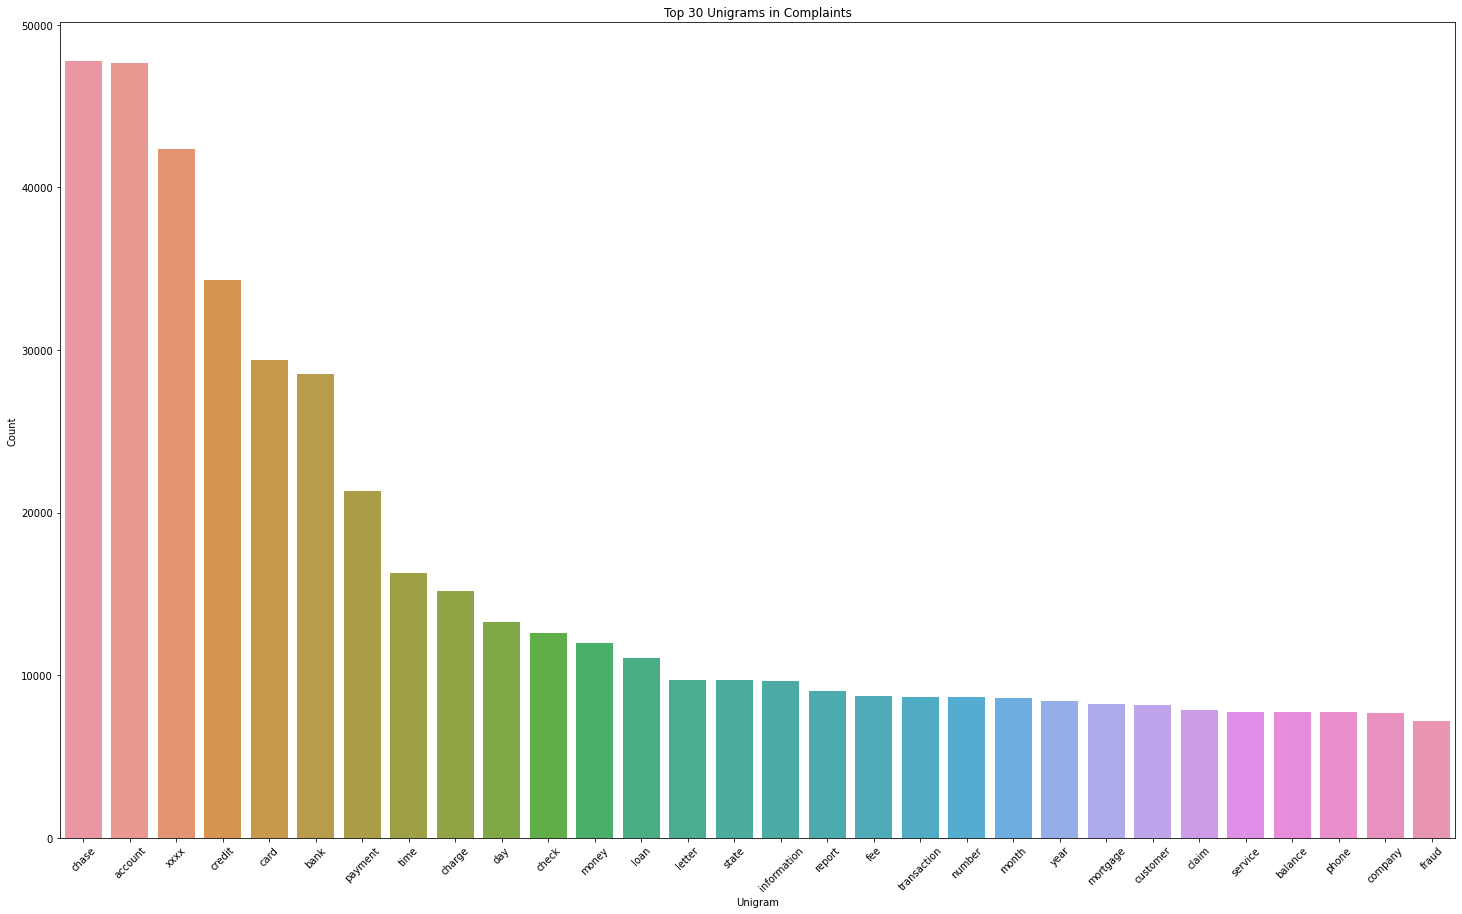

In [35]:
# Code to find the top 30 unigram frequency among the complaints in the cleaned datafram(df_clean). 

common_words = get_top_n_ngram(df_clean['Complaint_clean'], 1, 30)
df1 = pd.DataFrame(common_words, columns = ['Unigram' , 'Count'])
plt.figure(figsize=[25,15])
plt.xticks(rotation=45)
fig = sns.barplot(x=df1['Unigram'], y=df1['Count'])
plt.title('Top 30 Unigrams in Complaints')
plt.show()

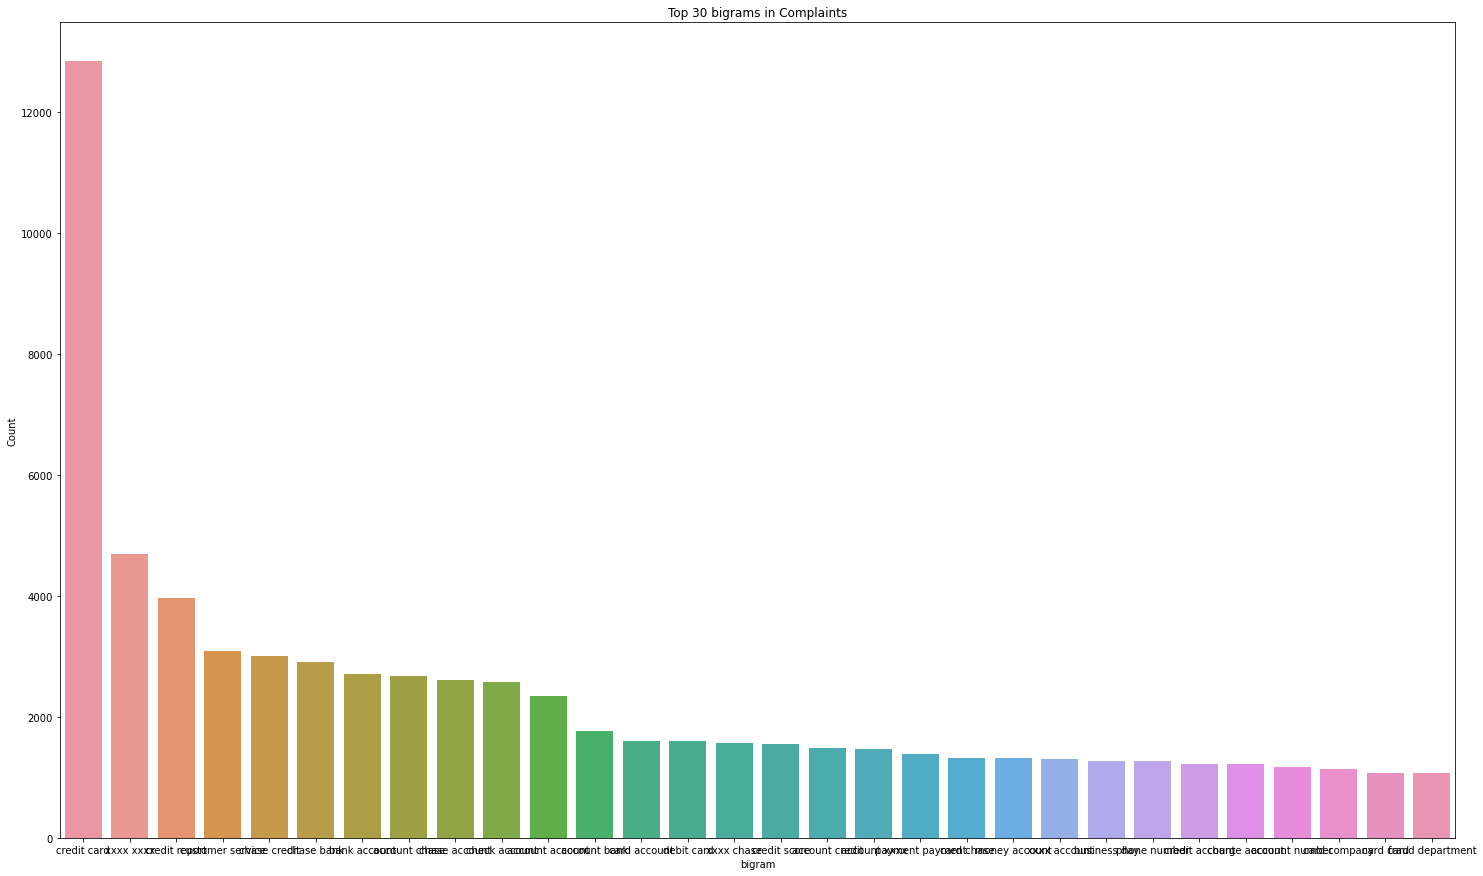

In [36]:
# Code to find the top 30 bigram frequency among the complaints in the cleaned datafram(df_clean). 

common_words = get_top_n_ngram(df_clean['Complaint_clean'], 2, 30)
df2 = pd.DataFrame(common_words, columns = ['bigram' , 'Count'])
plt.figure(figsize=[25,15])
fig = sns.barplot(x=df2['bigram'], y=df2['Count'])
plt.title('Top 30 bigrams in Complaints')
plt.show()

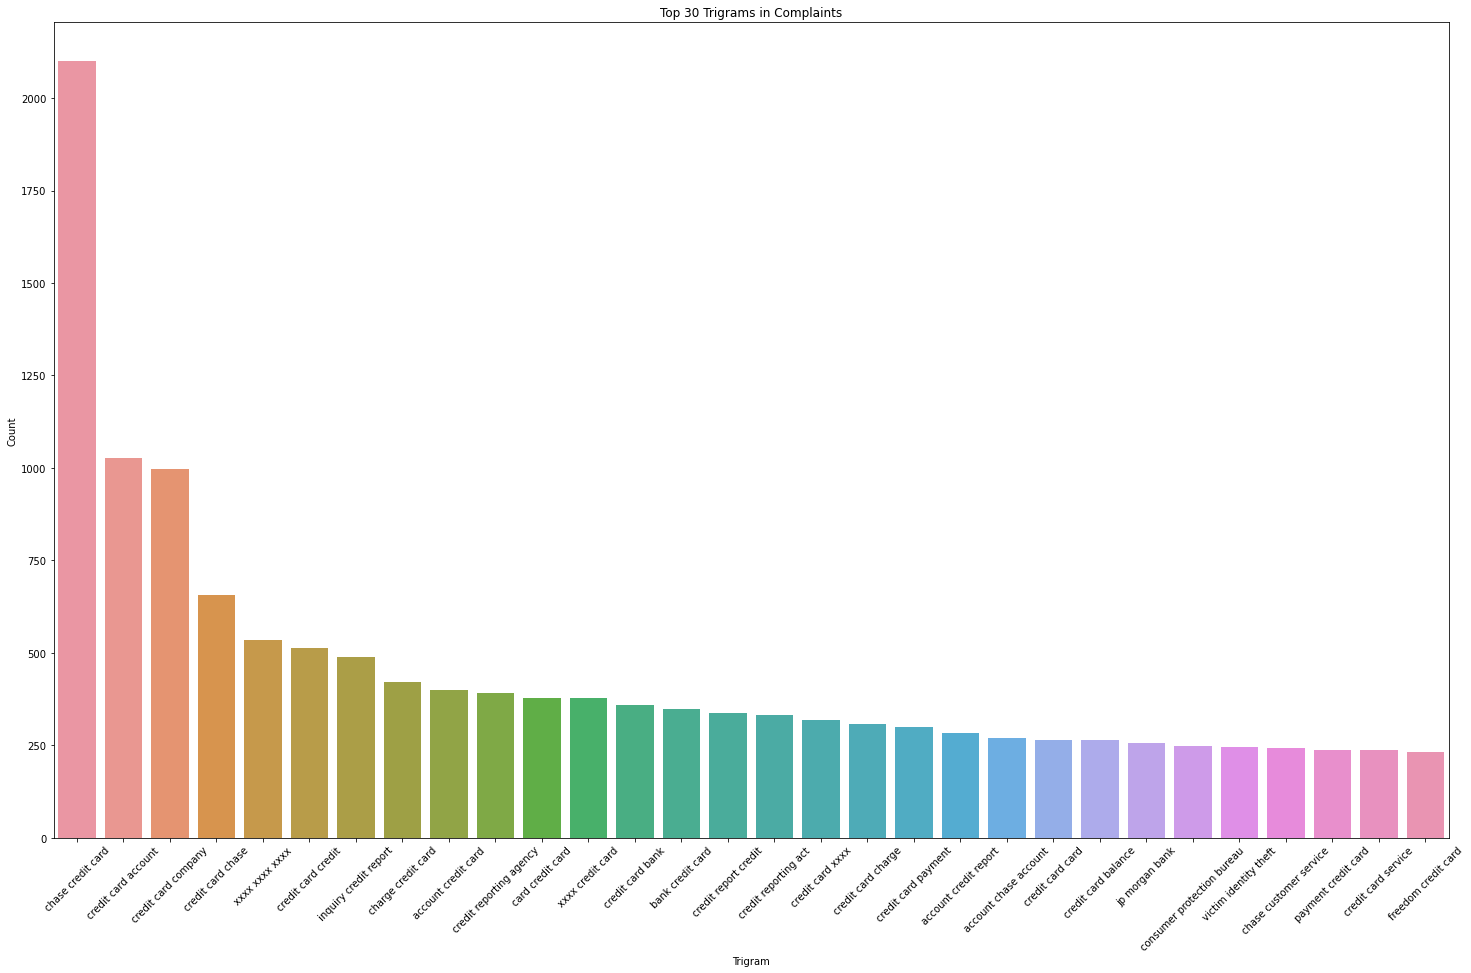

In [37]:
# Code to find the top 30 trigram frequency among the complaints in the cleaned datafram(df_clean). 

common_words = get_top_n_ngram(df_clean['Complaint_clean'], 3, 30)
df3 = pd.DataFrame(common_words, columns = ['Trigram' , 'Count'])
plt.figure(figsize=[25,15])
plt.xticks(rotation=45)
fig = sns.barplot(x=df3['Trigram'], y=df3['Count'])
plt.title('Top 30 Trigrams in Complaints')
plt.show()

In [38]:
df_clean['Complaint_clean'] = df_clean['complaint_POS_removed'].str.replace('xxxx','')


### Feature Extraction
Convert the raw texts to a matrix of TF-IDF features

max_df is used for removing terms that appear too frequently, also known as "corpus-specific stop words" max_df = 0.95 means "ignore terms that appear in more than 95% of the complaints"

min_df is used for removing terms that appear too infrequently min_df = 2 means "ignore terms that appear in less than 2 complaints"

In [39]:
# Code to initialise the TfidfVectorizer 

tfidf = TfidfVectorizer(stop_words='english', min_df=2, max_df=0.95)

In [40]:
# Code to create the Document Term Matrix by transforming the complaints column present in df_clean.

dtm = tfidf.fit_transform(df_clean['Complaint_clean'])

### Topic Modelling

In [42]:
from sklearn.decomposition import NMF


### Manual Topic Modelling

In [43]:
# Load your nmf_model with the n_components i.e 5

num_topics = 5 

# keep the random_state =40
nmf_model =  NMF(n_components=num_topics, random_state=40) 

In [44]:
# Obtain W and H

W = nmf_model.fit_transform(dtm)
H = nmf_model.components_

len(tfidf.get_feature_names())

6991

In [45]:
# Print the Top15 words for each of the topics

words = np.array(tfidf.get_feature_names())
topic_words = pd.DataFrame(np.zeros((num_topics, 15)), index=[f'Topic {i}' for i in range(num_topics)],
                columns=[f'Word {i + 1}' for i in range(15)]).astype(str)

for i in range(num_topics):
    ix = H[i].argsort()[::-1][:15]
    topic_words.iloc[i] = words[ix]
topic_words 

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15
Topic 0,account,check,bank,money,fund,chase,deposit,branch,day,number,business,transaction,claim,transfer,customer
Topic 1,credit,card,report,inquiry,chase,account,score,company,limit,information,debt,application,letter,year,balance
Topic 2,payment,balance,month,fee,statement,auto,day,time,pay,date,credit,account,chase,mortgage,year
Topic 3,charge,card,fee,dispute,transaction,chase,merchant,fraud,purchase,claim,service,time,refund,statement,company
Topic 4,loan,mortgage,home,modification,chase,property,year,letter,rate,time,document,bank,house,foreclosure,sale


In [46]:
# Create the best topic for each complaint in terms of integer value 0,1,2,3 & 4

colnames = ["Topic {}".format(i) for i in range(nmf_model.n_components)]
complaintnames = ["Complaint{}".format(i) for i in range(len(df_clean.index))]
df_doc_topic = pd.DataFrame(W, columns=colnames, index=complaintnames)
significant_topic = np.argmax(df_doc_topic.values, axis=1)
df_doc_topic['dominant_topic'] = significant_topic
df_clean['topic_id'] = significant_topic

df_doc_topic

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,dominant_topic
Complaint0,0.022156,0.013101,0.006715,0.007531,0.022067,0
Complaint1,0.008853,0.014695,0.002172,0.011886,0.005990,1
Complaint2,0.000000,0.048524,0.000000,0.002381,0.000000,1
Complaint3,0.018462,0.063451,0.000677,0.006766,0.020370,1
Complaint4,0.066752,0.000000,0.000000,0.004357,0.009498,0
...,...,...,...,...,...,...
Complaint21067,0.000000,0.075201,0.017366,0.056183,0.000000,1
Complaint21068,0.007051,0.009785,0.000000,0.035535,0.011204,3
Complaint21069,0.014652,0.014948,0.000000,0.023656,0.009708,3
Complaint21070,0.000000,0.045207,0.095593,0.017504,0.000000,2


In [47]:
W = pd.DataFrame(W, columns=[f'Topic {i}' for i in range(num_topics)], index=[f'Complaint{i}' for i in range(W.shape[0])])
W['max_topic'] = W.apply(lambda x: x.idxmax(), axis=1)
W[pd.notnull(W['max_topic'])].head(10)

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,max_topic
Complaint0,0.022156,0.013101,0.006715,0.007531,0.022067,Topic 0
Complaint1,0.008853,0.014695,0.002172,0.011886,0.005990,Topic 1
Complaint2,0.000000,0.048524,0.000000,0.002381,0.000000,Topic 1
Complaint3,0.018462,0.063451,0.000677,0.006766,0.020370,Topic 1
Complaint4,0.066752,0.000000,0.000000,0.004357,0.009498,Topic 0
Complaint5,0.000000,0.051049,0.000000,0.000000,0.000000,Topic 1
Complaint6,0.064017,0.002374,0.014083,0.009237,0.007530,Topic 0
Complaint7,0.003389,0.001954,0.054151,0.006865,0.046079,Topic 2
Complaint8,0.026216,0.000000,0.003379,0.057059,0.019690,Topic 3
Complaint9,0.000000,0.122632,0.000000,0.002017,0.001251,Topic 1


In [48]:
# Assign the best topic to each of the cmplaints in Topic Column
df_clean['Topic'] = W.max_topic.values 

In [49]:
# Print the first 5 Complaint for each of the Topics
df_clean_grp=df_clean.groupby('Topic')
df_clean_grp['Topic']

In [50]:
df_clean

,complaint_what_happened,complaints_lemma,complaint_POS_removed,complaint_len,Complaint_clean,topic_id,Topic
0,good morning my name is xxxx xxxx and i apprec...,good morning my name be xxxx xxxx and I apprec...,morning name stop bank cardmember service ask ...,482,morning name stop bank cardmember service ask ...,0,Topic 0
1,i upgraded my xxxx xxxx card in xx xx and was...,I upgrade my xxxx xxxx card in xx xx and be ...,card agent upgrade date agent information orde...,351,card agent upgrade date agent information orde...,1,Topic 1
2,chase card was reported on xx xx however fr...,chase card be report on xx xx however fra...,card application identity consent service cred...,220,card application identity consent service cred...,1,Topic 1
3,on xx xx while trying to book a xxxx xxxx ...,on xx xx while try to book a xxxx xxxx ...,try book xxxx ticket offer ticket card informa...,1470,try book ticket offer ticket card information...,1,Topic 1
4,my grand son give me check for i deposit ...,my grand son give I check for I deposit ...,son chase account fund bank account pay money ...,466,son chase account fund bank account pay money ...,0,Topic 0
...,...,...,...,...,...,...,...
21067,after being a chase card customer for well ove...,after be a chase card customer for well over a...,card customer decade solicitation credit card ...,668,card customer decade solicitation credit card ...,1,Topic 1
21068,on wednesday xx xx xxxx i called chas my xxx...,on wednesday xx xx xxxx I call chas my xxx...,visa credit card provider claim purchase prote...,2113,visa credit card provider claim purchase prote...,3,Topic 3
21069,i am not familiar with xxxx pay and did not un...,I be not familiar with xxxx pay and do not und...,pay risk provide consumer bank app chase year ...,2317,pay risk provide consumer bank app chase year ...,3,Topic 3
21070,i have had flawless credit for yrs i ve had ...,I have have flawless credit for yrs I ve h...,credit yrs credit card chase freedom xxxx prob...,2129,credit yrs credit card chase freedom problem ...,2,Topic 2


After evaluating the mapping, if the topics assigned are correct then assign these names to the relevant topic:
- Account services
- Credit card
- Fraud Reporting
- Loan
- Others

In [51]:

#Create the dictionary of Topic names and Topics
Topic_names = {
    'Topic 0':'Bank account services',
    'Topic 1':'Credit card / Prepaid card',
    'Topic 2':'Others',
    'Topic 3':'Theft/Dispute reporting',
    'Topic 4':'Mortgages/loans'    
}

#Replace Topics with Topic Names
df_clean['Topic'] = df_clean['Topic'].map(Topic_names)

In [52]:
df_clean.head()

,complaint_what_happened,complaints_lemma,complaint_POS_removed,complaint_len,Complaint_clean,topic_id,Topic
0,good morning my name is xxxx xxxx and i apprec...,good morning my name be xxxx xxxx and I apprec...,morning name stop bank cardmember service ask ...,482,morning name stop bank cardmember service ask ...,0,Bank account services
1,i upgraded my xxxx xxxx card in xx xx and was...,I upgrade my xxxx xxxx card in xx xx and be ...,card agent upgrade date agent information orde...,351,card agent upgrade date agent information orde...,1,Credit card / Prepaid card
2,chase card was reported on xx xx however fr...,chase card be report on xx xx however fra...,card application identity consent service cred...,220,card application identity consent service cred...,1,Credit card / Prepaid card
3,on xx xx while trying to book a xxxx xxxx ...,on xx xx while try to book a xxxx xxxx ...,try book xxxx ticket offer ticket card informa...,1470,try book ticket offer ticket card information...,1,Credit card / Prepaid card
4,my grand son give me check for i deposit ...,my grand son give I check for I deposit ...,son chase account fund bank account pay money ...,466,son chase account fund bank account pay money ...,0,Bank account services


In [53]:
#Keep the columns"complaint_what_happened" & "Topic" only in the new dataframe --> training_data

training_data=df_clean[['complaint_what_happened', 'topic_id']]

<BarContainer object of 5 artists>

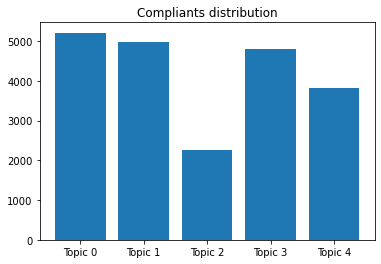

In [54]:
# check the spread of the data for class imbalance
topic_grp = training_data.groupby('topic_id')
plt.title('Compliants distribution')
plt.xticks(np.arange(5), ['Topic 0','Topic 1','Topic 2','Topic 3','Topic 4'])
plt.bar(height = topic_grp.complaint_what_happened.count(), x = topic_grp.complaint_what_happened.count().index)

In [55]:
# Split into train, validation 80%,20% respectively
X_train_complaint, X_test_complaint, y_train, y_test = train_test_split(training_data['complaint_what_happened'],training_data['topic_id'], train_size=0.8, random_state=42)
# Code to get the Vector count
count_vect = CountVectorizer()
X_train = count_vect.fit_transform(X_train_complaint)
X_test = count_vect.transform(X_test_complaint)

# Code here to transform the word vector to tf-idf
tfidf_transformer = TfidfTransformer()
X_train = tfidf_transformer.fit_transform(X_train)
X_test = tfidf_transformer.transform(X_test)

In [56]:
# View shape of the test and train
print('Train data:\nx_train: {0} y_train: {1}'.format(X_train.shape, y_train.shape))
print('Test data:\nx_test: {0} y_test: {1}'.format(X_test.shape, y_test.shape))

Train data:
x_train: (16857, 25358) y_train: (16857,)
Test data:
x_test: (4215, 25358) y_test: (4215,)


You have to try atleast 3 models on the train & test data from these options:

- Logistic regression
- Decision Tree
- Random Forest
- Naive Bayes (optional)
- Using the required evaluation metrics judge the tried models and select the ones performing the best

Build the following models

- Logistic regression
- Decision Tree
- Random Forest

In [59]:
# For y_true and y_pred display the Classification Metrics
def computeClassificationMetrics(y_test,y_test_pred,y_train,y_train_pred, plot=True,):
        print('*'*20+"Classification Report"+'*'*20)
        print('Performance on Train data: \nprecision: {0}\nRecall: {1}\nf1-score: {2}'.format(round(metrics.precision_score(y_train,
            y_train_pred, average='weighted'),4),round(metrics.recall_score(y_train,y_train_pred, average='weighted'),4),
              round(metrics.f1_score(y_train,y_train_pred, average='weighted'),4)))
        print('\nPerformance on Test data:\n',classification_report(y_test,y_test_pred))

In [60]:
# Function for training models and testing on a test set.

def model_fit(alg, X_train_data, y_train_data, X_test_data, y_test_data, plot=True):
    
    #Fit the algorithm on the data
    alg.fit(X_train_data, y_train_data)
        
    #Predict training set:
    y_train_pred = alg.predict(X_train_data)
    #Predict validation set:
    y_test_pred = alg.predict(X_test_data)
      
    computeClassificationMetrics(y_test_data, y_test_pred,y_train_data,y_train_pred)

In [61]:
# Model1 : Logistic Regression
logreg = LogisticRegression(random_state = 42, max_iter=400)

# Model fit on train and test data
model_fit(logreg,X_train, y_train, X_test, y_test ,True)

********************Classification Report********************
Performance on Train data: 
precision: 0.9705
Recall: 0.9704
f1-score: 0.9704

Performance on Test data:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      1055
           1       0.93      0.95      0.94      1039
           2       0.96      0.87      0.92       446
           3       0.90      0.90      0.90       963
           4       0.93      0.93      0.93       712

    accuracy                           0.93      4215
   macro avg       0.93      0.92      0.93      4215
weighted avg       0.93      0.93      0.93      4215



In [62]:
# Using Decision Trees
dt = DecisionTreeClassifier(max_depth=8, random_state=40)

# Model fit on train and validate data
model_fit(dt,X_train, y_train, X_test, y_test ,True)

********************Classification Report********************
Performance on Train data: 
precision: 0.8009
Recall: 0.781
f1-score: 0.7826

Performance on Test data:
               precision    recall  f1-score   support

           0       0.64      0.84      0.73      1055
           1       0.78      0.81      0.80      1039
           2       0.79      0.72      0.76       446
           3       0.75      0.62      0.68       963
           4       0.91      0.70      0.79       712

    accuracy                           0.75      4215
   macro avg       0.77      0.74      0.75      4215
weighted avg       0.76      0.75      0.75      4215



In [63]:
# Using Random Forest Model :
rfc = RandomForestClassifier(random_state=40)

# Model fit on train and validate data
model_fit(rfc,X_train, y_train, X_test, y_test ,True)

********************Classification Report********************
Performance on Train data: 
precision: 1.0
Recall: 1.0
f1-score: 1.0

Performance on Test data:
               precision    recall  f1-score   support

           0       0.80      0.92      0.85      1055
           1       0.82      0.86      0.84      1039
           2       0.92      0.48      0.63       446
           3       0.80      0.80      0.80       963
           4       0.87      0.87      0.87       712

    accuracy                           0.82      4215
   macro avg       0.84      0.79      0.80      4215
weighted avg       0.83      0.82      0.82      4215



In [65]:
#Model4: Multinomial Naive Bayes
# Using multinomial Naive Bayes classifier
mnb = MultinomialNB()

# Model fit on train and test data
model_fit(mnb,X_train, y_train, X_test, y_test ,True)

********************Classification Report********************
Performance on Train data: 
precision: 0.7926
Recall: 0.7629
f1-score: 0.7263

Performance on Test data:
               precision    recall  f1-score   support

           0       0.66      0.91      0.77      1055
           1       0.73      0.77      0.75      1039
           2       1.00      0.02      0.04       446
           3       0.73      0.78      0.75       963
           4       0.85      0.78      0.81       712

    accuracy                           0.73      4215
   macro avg       0.79      0.65      0.62      4215
weighted avg       0.76      0.73      0.69      4215

